In [9]:
import os
import torch
import warnings

import models
import utils
import run 

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
models_dict = models.load_all_models(device)

class MockArgs:
    def __init__(self, mode, output_dir, api_key=None, base_url=None):
        self.mode = mode
        self.output = output_dir
        self.api_key = api_key
        self.base_url = base_url


output_directory = "./notebook_outputs"
os.makedirs(output_directory, exist_ok=True)

args = MockArgs(mode="blip", output_dir=output_directory)

# for LLM mode:
# args = MockArgs(
#     mode="llm", 
#     output_dir=output_directory,
#     api_key="YOUR_API_KEY_HERE", 
#     base_url="base_url"
# )

Loading BLIP-Large model...
BLIP-Large model loaded.
Loading Grounding DINO model...
final text_encoder_type: bert-base-uncased
Grounding DINO model loaded.
Loading SAM model...
SAM model loaded.
spaCy model loaded.


In [7]:
IMAGE_PATH = "assets/sa_717.jpg"

masks, image_rgb, class_colors = run.process_image(IMAGE_PATH, models_dict, args)


--- Processing assets/sa_717.jpg ---
Generating 25 captions with BLIP-Large...
BLIP Caption 0: 'people walking down a sidewalk with a dog and a man with a backpack'
BLIP Caption 1: 'people sitting on benches in a park with a fountain in the background'
BLIP Caption 2: 'there are people sitting on the sidewalk playing music on the guitar'
BLIP Caption 3: 'there is a man playing a guitar and a woman sitting on a bench'
BLIP Caption 4: 'people sitting on the ground in a park with a guitar'
BLIP Caption 5: 'there are people that are playing music in the park'
BLIP Caption 6: 'people are sitting on benches in a park with a fountain'
BLIP Caption 7: 'there are people standing around a man playing a guitar'
BLIP Caption 8: 'people are gathered around a man playing guitar on a bench'
BLIP Caption 9: 'there is a sheep that is standing in the grass by the water'
BLIP Caption 10: 'there is a man that is standing in the grass with a frisbee'
BLIP Caption 11: 'there are many birds that are sitting

Displaying results in notebook...


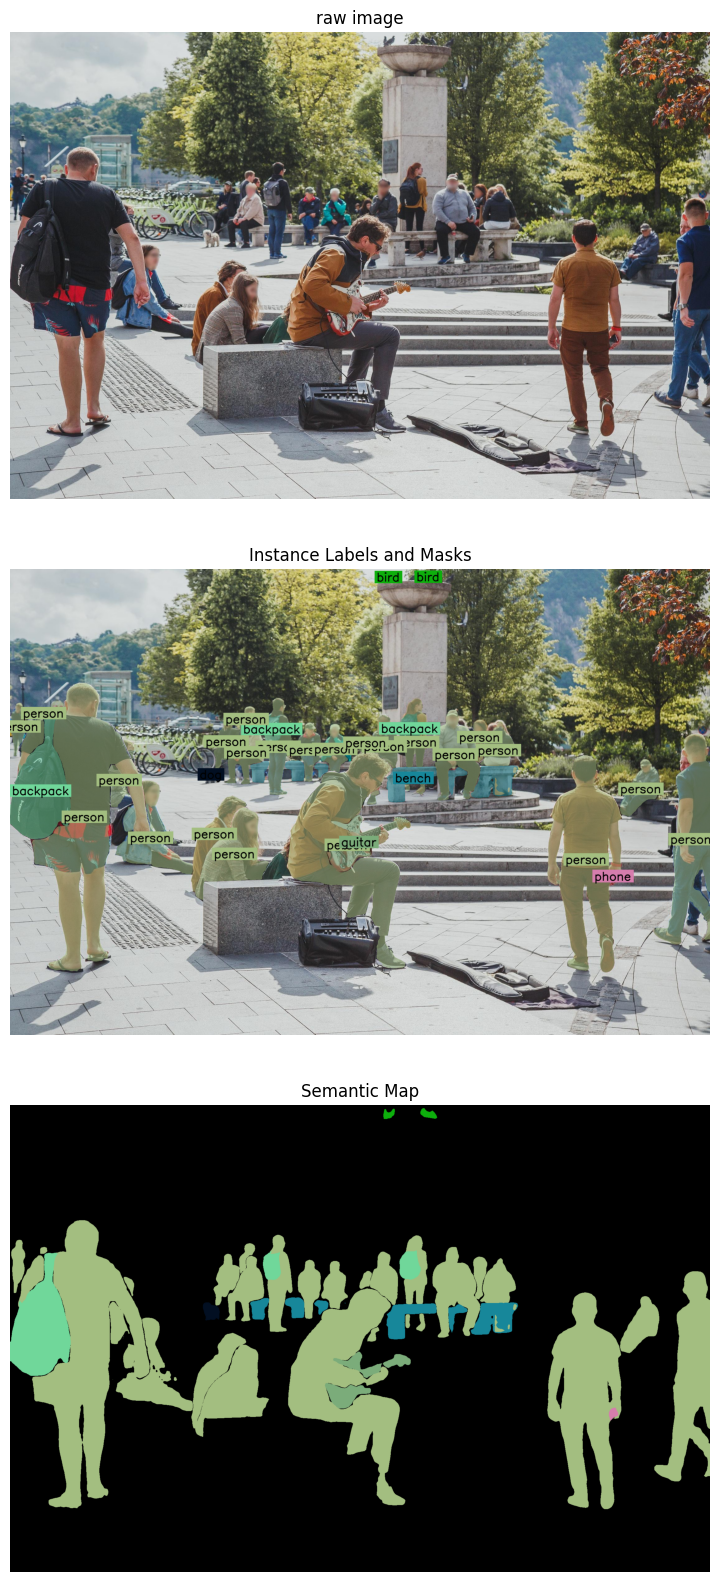

In [8]:
if masks:
    print("Displaying results in notebook...")
    utils.show_visualizations(image_rgb, masks, class_colors)
else:
    print("No masks were generated for this image.")